# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 8</font>
## <font color='blue'>Engenharia de Atributos em Dados Médicos - Parte 1</font>

![title](imagens/Projeto8.png)

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os Dados e Compreendendo as Variáveis

In [2]:
# Carregando os dados
dados = pd.read_csv("dados/diabetic_data.csv")

In [3]:
# Shape
dados.shape

(101766, 50)

In [4]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Limpeza e Transformação dos Dados

In [6]:
# Verificando valores nulos (ausentes)
dados.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [8]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o número de valores exclusivos for menor que 15, imprima os valores. 
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

O caracter '?' nada mais é do que valor ausente. Vamos limpar isso.

In [9]:
# Vamos verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count()> 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'Valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')


Coluna race tem 2273 Valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 Valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 Valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 Valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 Valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 Valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 Valores com o caracter "?"
Isso representa 1.4 % do total


In [10]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 2), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.0 % do total


**Agora a parte importante - decidir o que fazer!**

- Falta os dados sobre peso do paciente em mais de 96% dos registros. 

- O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%. 

- As demais variáveis apresentam um baixo percentual de valores ausentes.

O que fazer?

**Alternativas:**

- Colocar a variável peso como categórica com dois labels: disponível / não disponível (1 e 0).
- Criar um código genérico para a variável payer_code como 99 e preencher os valores ausentes.
- Criar um tipo genérico para a variável medical_specialty como 'Sem Especialidade Definida' e preencher os valores ausentes.
- Para a variável gender são apenas 3 registros e o ideal é removê-los.

**Decisão:**

- 1- Devido à fraca interpretabilidade dos valores ausentes da variável peso, o melhor é simplesmente ignorar a variável e removê-la.

- 2- Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.

- 3- Vamos remover os registros com "?" das demais variáveis.

- 4- Para a variável gender vamos remover os 3 registros com categoria "Unknown/Invalid".

In [11]:
# Removendo as 3 colunas com alto percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis= 1)

Para as demais variáveis com baixo percentual de valores ausentes, removemos os registros.

In [12]:
# Removemos os registros com baixo percentual de valores ausentes
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Uknown/Invalid']

In [13]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [14]:
# Shape
dados.shape

(98053, 47)

Será que temos variáveis com um único valor?

In [15]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [16]:
# Checando por variáveis com um único valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


Vamos eliminar as colunas que têm apenas 1 valor único, pois elas não adicionam nada à nossa análise.

In [17]:
# Removendo variáveis com valores únicos
dados = dados.loc[:, dados.nunique() != 1]

In [19]:
dados.shape

(98053, 44)

### Engenharia de Atributos

### Ajustando a Variável Alvo Para Estratificação de Risco

Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições agora são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico. 

Nossa variável alvo é 'readmiited'. Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:

-- < 30 (readmissão em menos de 30 dias)

-- > 30 (readmissão em mais de 30 dias)

-- No   (sem readmissão)

Nós podemos combinar a readmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [20]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [21]:
dados['readmitted'].value_counts()

readmitted
NO     52338
>30    34649
<30    11066
Name: count, dtype: int64

In [22]:
# Primeiro, vamos criar uma cópia do dataset até aqui
dados_clean1 = dados

# Se precisar voltar a este ponto, apenas execute:
# dados = dados_clean1

# Assim não terá que executar todo jupyter notebook até aqui

In [23]:
# Ajustando a variável alvo

# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta

dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

C:\Users\gabri\AppData\Local\Temp\ipykernel_108344\3841498232.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['readmitted'] = dados['readmitted'].replace('NO', 0)


In [24]:
# Verifica os valores únicos
dados['readmitted'].unique()

array([1, 0])

In [25]:
# Checa o tipo de dado
dados['readmitted'].dtype

dtype('int64')

In [ ]:
dados.head()

In [26]:
# Verifica a proporção de cada classe
round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

readmitted
0    53.0
1    47.0
Name: count, dtype: float64

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


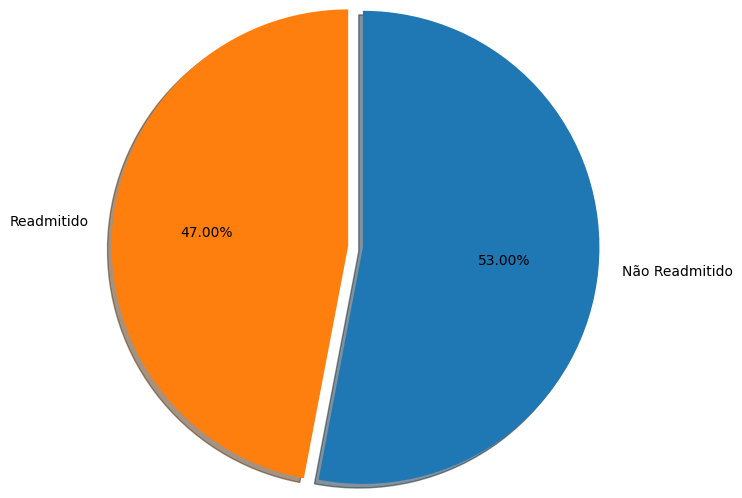

In [27]:
# Vamos visualizar de forma gráfica

# Percentual de cada valor da variável alvo
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Não Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

Cerca de 47% dos pacientes de diabetes foram readmitidos nos hospitais.

### Recategorização de Variável

Como tratamos a variável idade?

In [28]:
# Tipo da variável
dados.age.dtype

dtype('O')

In [29]:
# Total de pacientes por faixa etária
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25306
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

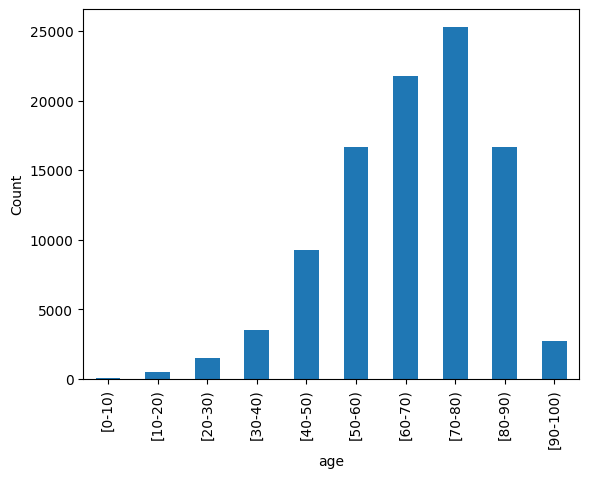

In [30]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos. 

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente. 

Podemos adotar duas abordagens:

- 1- Se queremos ver o efeito do aumento da idade na readmissão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria de idade. Por exemplo, se a categoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idade em pontos médios, resultando em uma variável numérica.


- 2- Podemos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.

Adotaremos a opção 2 pois altera menos a informação contida nos dados.

In [39]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in dados['age']], index = dados.index)

# Acima de 80 anos ficam na faixa de 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

# As outras faixas são mantidas

In [40]:
# Tipo ds variável
dados.age.dtype

dtype('O')

Text(0, 0.5, 'Count')

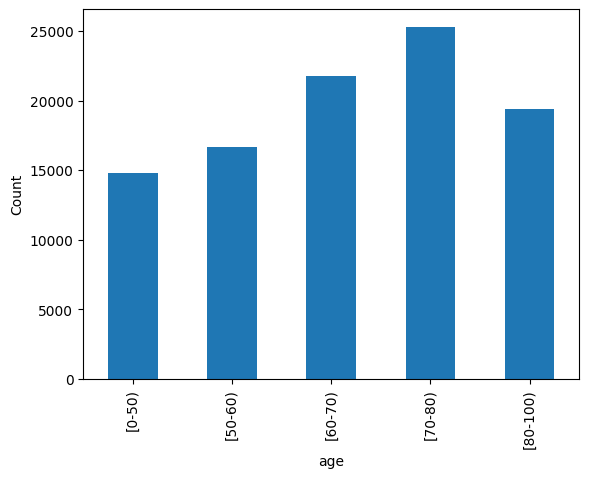

In [41]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Como tratamos variáveis do tipo ID? Seguiremos com a Recategorização de Variável.

Uma análise mais detalhada do arquivo IDs_mapping.csv revelará que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' têm valores com significado semelhante. Eles podem ser mesclados para ter menos valores.